In [1]:
# Modelo de AM para aplicação do algoritmo LogisticRegression
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
# Carregamento do banco de dados
import pandas as pd 
arquivo = pd.read_csv('C:/UCPEL/IA-ML/EEG_Eye_State_Classification.csv')

In [3]:
# Visualização do conjunto de dados (cinco primeiras amostras)
arquivo.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [4]:
# Visualização do tamanho do banco de dados
arquivo.shape

(14980, 15)

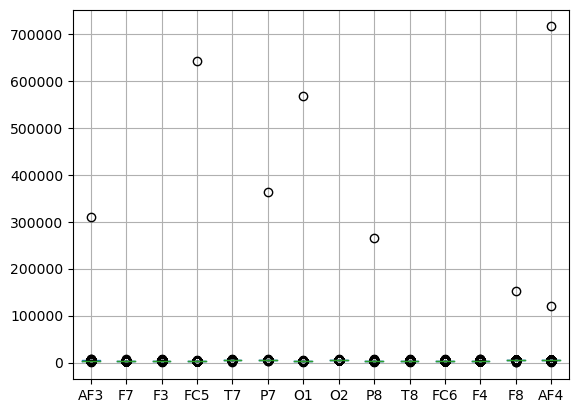

In [5]:
# Boxplot do Matplotlib
arquivo.boxplot(column=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4'])
plt.show()

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AF3'>

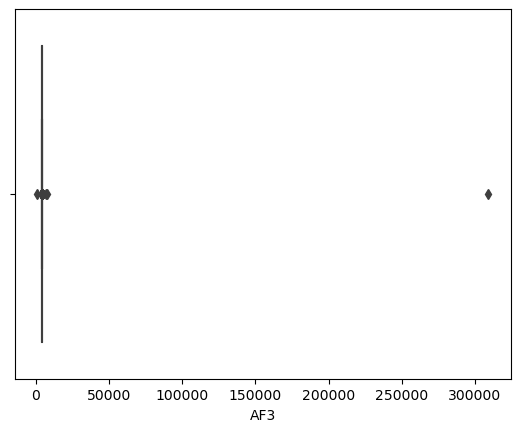

In [6]:
# Boxplot da biblioteca Seaborn (Atributo AF3)
sns.boxplot(arquivo['AF3'])

In [7]:
# Posição dos Outliers (Atributo AF3)
print(np.where(arquivo['AF3']<4000))
print(np.where(arquivo['AF3']>5000))

(array([13179], dtype=int64),)
(array([  898, 10386, 11509], dtype=int64),)


In [8]:
# Método IQR para tratamento de Outliers (AF3)
Q1 = np.percentile(arquivo['AF3'], 25, interpolation = 'midpoint')
Q3 = np.percentile(arquivo['AF3'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", arquivo.shape)

Old Shape:  (14980, 15)


In [9]:
# Upper bound
upper = np.where(arquivo['AF3'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(arquivo['AF3'] <= (Q1-1.5*IQR))

In [10]:
# Removendo outliers
arquivo.drop(upper[0], inplace=True)
arquivo.drop(lower[0], inplace=True)

print("New Shape: ", arquivo.shape)

New Shape:  (13495, 15)


C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AF3'>

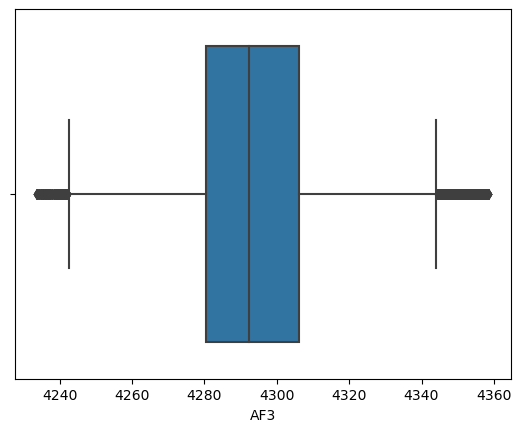

In [11]:
# Boxplot da biblioteca Seaborn (Atributo AF3)
sns.boxplot(arquivo['AF3'])

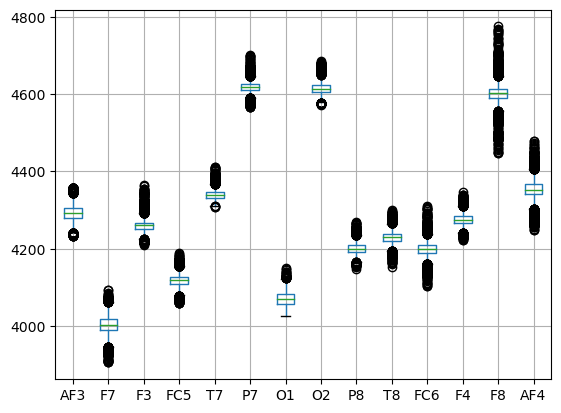

In [12]:
# Boxplot do Matplotlib
arquivo.boxplot(column=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4'])
plt.show()

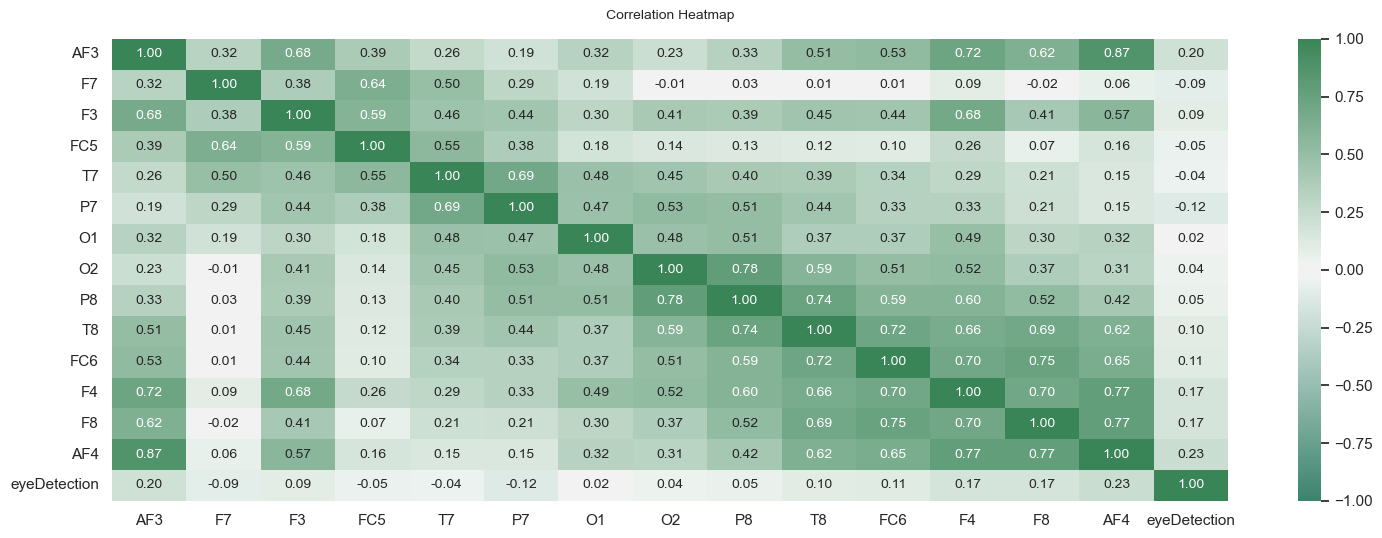

In [13]:
# Matriz de correlação (Biblioteca Seaborn), com os dados de correlação nas células
sns.set(font_scale=1)
plt.figure (figsize = (18, 6))
cmap = sns.diverging_palette(160, 140, sep=10, as_cmap=True)
heatmap = sns.heatmap(arquivo.corr(), cmap=cmap, annot=True, vmin=-1, vmax=1,fmt=".2f", annot_kws={'size':10})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=14);

In [14]:
# Separação das variáveis preditoras (características) e da variável alvo (desfecho)
y = arquivo['eyeDetection']
x = arquivo.drop('eyeDetection', axis = 1)

In [15]:
# Criação dos conjuntos de treino e teste (aleatório)
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [16]:
# Quantidade de dados para treino
x_treino.shape

(9041, 14)

In [17]:
# Quantidade de dados para teste
x_teste.shape

(4454, 14)

In [18]:
# Criação do modelo para aplicação do LogisticRegression
for i in range(100):
    modelo = LogisticRegression(max_iter=10000, penalty='none', solver='lbfgs')
    modelo.fit(x_treino, y_treino)

    #Impressão dos resultados
    resultado = modelo.score(x_teste, y_teste)
    print("Acurácia: ", resultado)

Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia:  0.6472833408172429
Acurácia: 

In [19]:
# Determinando a acurácia na amostra de treino
score_treino = modelo.score(x_treino, y_treino)
score_treino

0.6530251078420529

In [20]:
# Realizando previsão na amostra de teste
y_previsto = modelo.predict(x_teste)
score_teste = modelo.score(x_teste, y_teste)
score_teste

0.6472833408172429

In [21]:
# Gerando Matriz de Confusão
cm = confusion_matrix(y_teste, y_previsto)
cm

array([[1909,  541],
       [1030,  974]], dtype=int64)

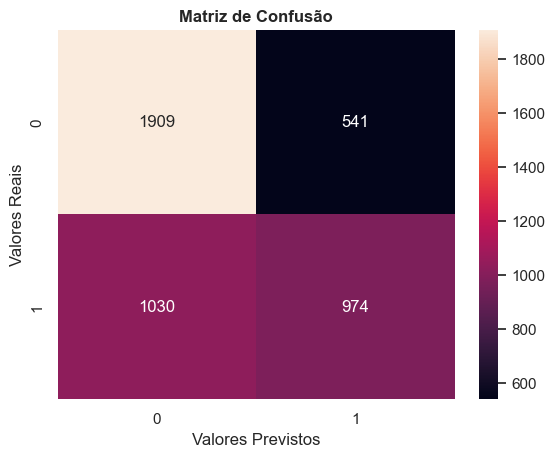

In [22]:
# Mapa de calor da Matriz de Confusão
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matriz de Confusão', weight='bold')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()